### Análise de sentimentos com dados do Twitter
[Base de dados do Kaggle](https://www.kaggle.com/datasets/leandrodoze/tweets-from-mgbr)  


Curso da Udemy:  
https://www.udemy.com/course/analise-e-mineracao-de-texto-classificacao-de-emocao-nlp/learn/lecture/34105460#overview

### 1 - Bibliotecas

In [23]:
# Modelagem de dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Tirar avisos
import warnings
warnings.filterwarnings('ignore')

# Configurações pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Configurações matplot
plt.rcParams['figure.figsize'] = ( 12, 6 )
plt.style.use('seaborn-darkgrid')


# REGEX
import re 
# NLP
import nltk 

### 2 - Importando a Base de Dados

In [24]:
base_dados = pd.read_csv('data\Tweets_Mg.csv')

In [25]:
### Ver dimensão
base_dados.shape

(8199, 26)

In [26]:
base_dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3 - Modelagem & EDA (Exploração dos dados)

In [27]:
# Avaliar campos nulos
base_dados.isnull().sum()

Unnamed: 0                      0
Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Observação                   8198
Unnamed: 10                  8199
Unnamed: 11                  8199
Unnamed: 12                  8199
Unnamed: 13                  8199
Unnamed: 14                  8199
Unnamed: 15                  8199
Unnamed: 16                  8199
Unnamed: 17                  8199
Unnamed: 18                  8199
Unnamed: 19                  8199
Unnamed: 20                  8199
Unnamed: 21                  8199
Unnamed: 22                  8199
Unnamed: 23                  8199
Unnamed: 24                  8199
dtype: int64

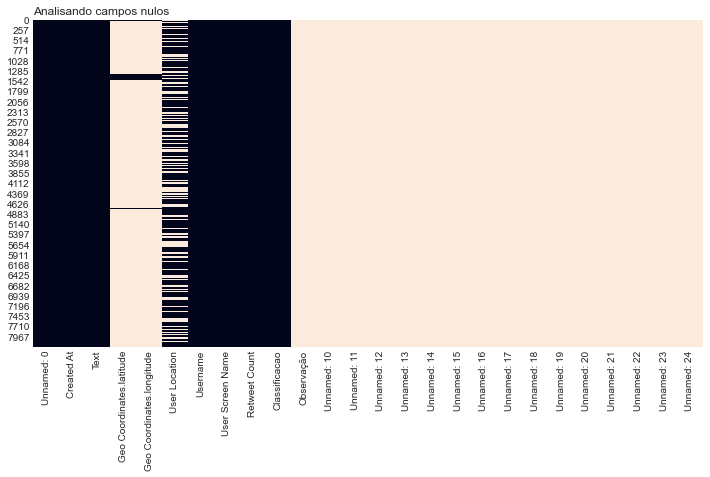

In [28]:
### Dados nulos de forma visual
nulos = base_dados.isnull()

plt.title('Analisando campos nulos', loc='left')
sns.heatmap( nulos, cbar=False );

# Interpretação
# Onde está sem cor são campos NULOS

In [29]:
# Colunas
base_dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

#### Remover as colunas nulas

In [30]:
extrair_colunas = base_dados.columns[10:]

In [31]:
base_dados.drop(columns=extrair_colunas, inplace=True)

In [32]:
base_dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao'],
      dtype='object')

In [33]:
base_dados.shape

(8199, 10)

In [34]:
### Campos únicos
base_dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [35]:
base_dados.drop( columns='Unnamed: 0', inplace=True)

In [36]:
base_dados.shape

(8199, 9)

In [37]:
### Verificando base de dados
base_dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [38]:
### Exportando a base com as transformações
base_dados.to_csv('data/transformacao_v1.csv')

In [39]:
# Importar base
base = pd.read_csv('data/transformacao_v1.csv')

In [41]:
base.shape

(8199, 10)

In [42]:
# Info
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 640.7+ KB


#### Ajustando Data

In [48]:
# Função
from dateutil.parser import parse

data_transformada = base['Created At'][0]
print(f'Antes: { data_transformada }' )
print(f'Depois: { parse( data_transformada ).date() }' )

Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [49]:
# Função para data
def ajustar_data( Data ):
    """
    Função para converter Data
    """
    # Atribuir
    texto_data = Data
    # Transformação
    transformacao = parse ( texto_data )
    # Extração
    data_formatada = transformacao.date()
    return data_formatada
                           

In [51]:
# apply - executa uma função em toda a coluna
base['Data_Formatada'] = base['Created At'].apply( ajustar_data )

In [52]:
base.iloc[0:5, 5:]

,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,NaN,Wândell,klefnews,0,Neutro,2017-01-08
2,NaN,Wândell,klefnews,0,Neutro,2017-01-08
3,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,NaN,Emily,Milly777,0,Negativo,2017-01-09


In [53]:
#### Com lambda
base['Created At'].apply( lambda data_formatada: parse( data_formatada ).date() )

0       2017-01-08
1       2017-01-08
2       2017-01-08
3       2017-01-04
4       2017-01-09
           ...    
8194    2017-02-09
8195    2017-02-09
8196    2017-02-09
8197    2017-02-09
8198    2017-02-07
Name: Created At, Length: 8199, dtype: object